## Data science snippets
### Elementary examle of single neuron network for classification task

Input space $\mathbb{R}^2$ are points on the surface which belong to 
two arbitrary classes.
Out space $\mathbb{R}$ are class labels between 0 and 1.

In test dataset poitns of two classes are linearly separated.
The illustration of neuron work is provided in the Wolfram Mathematica
script `plotter.nb`.

> for TeX typesetting plese use [Markdown All in One](https://marketplace.visualstudio.com/items?itemName=yzhang.markdown-all-in-one) extension. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

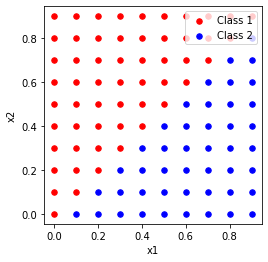

In [2]:
# test dataset points
dat_x = np.array([[x, y] for x in np.arange(0, 1, 0.1) for y in np.arange(0, 1, 0.1)])
dat_y = np.array([0 if _[0] > _[1] else 1 for _ in dat_x])
dat_y_color = ['red' if _ == 1 else 'blue' for _ in dat_y]
# plot dataset 
ax = plt.subplot(111)
cls1 = ax.scatter(dat_x[dat_x[:,0] >= dat_x[:, 1], 1], dat_x[dat_x[:,0] >= dat_x[:, 1], 0], s=30, marker='o', facecolor='r')
cls2 = ax.scatter(dat_x[dat_x[:,0] < dat_x[:, 1], 1], dat_x[dat_x[:,0] < dat_x[:, 1], 0], s=30, marker='o', facecolor='b')
ax.set_aspect(1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend((cls1, cls2), ('Class 1', 'Class 2'), scatterpoints=1)
plt.show()


In [3]:
# random initialization of initial weights (uniformly distributed random wariable)
w0 = [np.random.uniform(), np.random.uniform()]
# sigmoid finction and its derivative
f = lambda x: 1 / (1 + np.exp(-x))
df = lambda x: np.exp(-x) / (1 + np.exp(-x))**2

def out(xin, w):
    """Calculate out of neuron for given input and weights."""
    return np.dot(w, xin)

def update_weights(x_train, y_train, w0):
    """Update weights of neuron on the epoch."""
    tr = 1e-2
    dw1, dw2 = 0, 0
    loss = 0
    N = len(x_train)
    for xi, yi in zip(x_train, y_train):
        y0 = out(xi, w0)
        loss += (f(y0) - yi)**2 / N
        dw1 += 2 * (f(y0) - yi) * df(y0) * xi[0] 
        dw2 += 2 * (f(y0) - yi) * df(y0) * xi[1]
    
    w = [w0[0] - tr * dw1, w0[1] - tr * dw2] 
    # print(f"Loss: {'%.4f' % loss} weights: {'%.4f' % w[0]}, {'%.4f' % w[1]}")
    return w, loss



Loss: 0.0407 weights: -8.2251, 9.0348


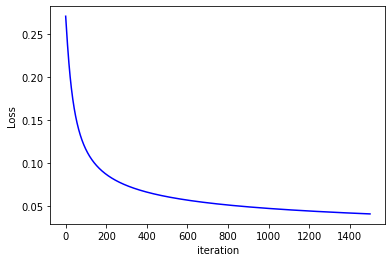

In [4]:
epochs = range(0, 1500)
new_w, tloss = update_weights(dat_x, dat_y, w0)
loss = [tloss]
for epoch in epochs:
    new_w, tloss = update_weights(dat_x, dat_y, new_w)
    loss.append(tloss)
print(f"Loss: {'%.4f' % loss[-1]} weights: {'%.4f' % new_w[0]}, {'%.4f' % new_w[1]}")

plt.plot(loss, c='b')
plt.xlabel("iteration")
plt.ylabel("Loss")
plt.show()